In [1]:
import json
import csv
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
!pip install seaborn
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable



- label: This feature indicates whether the file is labeled as benign (False) or malicious (True).
- .textsize: This feature represents the size of the .text section in the PE file.
- .textentropy: This feature represents the entropy of the .text section in the PE file.
- .textvsize: This feature represents the virtual size of the .text section in the PE file.
- .datasize: This feature represents the size of the .data section in the PE file.
- .dataentropy: This feature represents the entropy of the .data section in the PE file.
- .datavsize: This feature represents the virtual size of the .data section in the PE file.
- .rsrcsize: This feature represents the size of the .rsrc section in the PE file.
- .rsrcentropy: This feature represents the entropy of the .rsrc section in the PE file.
- .rsrcvsize: This feature represents the virtual size of the .rsrc section in the PE file.
- machine: This feature represents the type of machine for which the file is intended.
- subsystem: This feature represents the target subsystem for the PE file.
- generalsize: This feature represents the size of the general file information in the PE header.
- generalvsize: This feature represents the virtual size of the general file information in the PE header.
- generalhas_debug: This feature indicates whether the PE file has a debug section (True) or not (False).
- generalexports: This feature represents the number of exported functions in the PE file.
- generalimports: This feature represents the number of imported functions in the PE file.
- generalhas_relocations: This feature indicates whether the PE file has relocation information (True) or not (False).
- generalhas_resources: This feature indicates whether the PE file has resource information (True) or not (False).
- generalhas_signature: This feature indicates whether the PE file has a digital signature (True) or not (False).
- generalhas_tls: This feature indicates whether the PE file has thread local storage (TLS) information (True) or not (False).
- generalsymbols: This feature represents the number of symbols in the PE file.
- stringsnumstrings: This feature represents the number of printable strings in the PE file.
- stringsavlength: This feature represents the average length of the printable strings in the PE file.
- stringsprintabledist: This feature represents the histogram of printable characters within the printable strings.
- stringsprintables: This feature indicates whether the PE file contains printable strings (True) or not (False).
- stringsentropy: This feature represents the entropy of characters across all printable strings.
- stringspaths: This feature represents the number of strings that begin with "C:\" indicating paths.
- stringsurls: This feature represents the number of strings that contain "http://" or "https://" indicating URLs.
- stringsregistry: This feature represents the number of strings that contain "HKEY_" indicating registry keys.
- stringsMZ: This feature represents the number of strings that contain "MZ" indicating Windows PE droppers or bundled executables.
- cofftimestamp: This feature represents the timestamp in the COFF header of the PE file.
- coffmachine: This feature represents the target machine for which the PE file is intended.
- coffcharacteristics: This feature represents a list of image characteristics of the PE file.
- optionalsubsystem: This feature represents the target subsystem specified in the optional header of the PE file.
- optionaldll_characteristics: This feature represents a list of DLL characteristics of the PE file.
- optionalmagic: This feature represents the magic value in the optional header of the PE file.
- optionalmajor_image_version: This feature represents the major image version specified in the optional header of the PE file.
- optionalminor_image_version: This feature represents the minor image version specified in the optional header of the PE file.
- optionalmajor_linker_version: This feature represents the major linker version specified in the optional header of the PE file.
- optionalminor_linker_version: This feature represents the minor linker version specified in the optional header of the PE file.
- optionalmajor_operating_system_version: This feature represents the major operating system version specified in the optional header of the PE file.
- optionalminor_operating_system_version: This feature represents the minor operating system version specified in the optional header of the PE file.
- optionalmajor_subsystem_version: This feature represents the major subsystem version specified in the optional header of the PE file.
- optionalminor_subsystem_version: This feature represents the minor subsystem version specified in the optional header of the PE file.
- optionalsizeof_code: This feature represents the size of the code section specified in the optional header of the PE file.
- optionalsizeof_headers: This feature represents the size of the headers specified in the optional header of the PE file.
- optionalsizeof_heap_commit: This feature represents the size of the committed heap specified in the optional header of the PE file.


In [2]:
def load_dataset_from_jsonl(file_path):
    dataset = []
    
    for i in range(0,2):
        path= file_path + str(i) + '.jsonl'
        with open(path, 'r') as file:
            for line in file:
                data = json.loads(line)
                dataset.append(data)
    return dataset

file_path = 'ember/train_features_'

dataset = load_dataset_from_jsonl(file_path)



In [3]:

features= {}
features['label']=[]

def extract_features(feature, feature_name):
    global features
    
    for key, value in feature.items(): 
        
        string_name = feature_name + '' + key
        if string_name not in features:
            features[string_name]= []
        
        if isinstance(value, int) or isinstance(value, float):
            features[string_name].append(value)
        else:
            features[string_name].append(None)
    

section_names = ['.text', '.data', '.rsrc']
feature_names = ['size', 'entropy', 'vsize']

for section in section_names:
    for feature in feature_names:
        features[section + feature] = []

features['machine']=[]
features['subsystem']=[]


for data in dataset:
    
    if data['label'] == -1:
        continue

#     val1, val2, val3=0,0,0
    section_count_list = {'.text':0, '.data':0, '.rsrc':0}
    for item in data['section']['sections']:
        
        if item['name'] in section_names:
            section_count_list[item['name']]+=1
    
    check = False
    for key,value in section_count_list.items():
        if value!=1:
            check=True
            break
    
    if check:
        continue
        
    feature_names = ['size', 'entropy', 'vsize']
        
    for item in data['section']['sections']:

        if item['name'] in section_names:
            
            for feature in feature_names:
                val = item[feature] if item[feature]!=None else None
                features[item['name'] + feature].append(val)
    
    feature_names = ['general', 'strings']

    for feature in feature_names:
        extract_features(data[feature], feature)

    for item in data['header']:
        extract_features(data['header'][item], item)
        
    features['machine'].append(data['header']['coff']['machine'])
    features['subsystem'].append(data['header']['optional']['subsystem'])
    
    
    features['label'].append(data['label'])

df = pd.DataFrame(features)
print(df['label'].value_counts())


label
0    42425
1    39649
Name: count, dtype: int64


In [4]:
print(df.isnull().any())

label                                     False
.textsize                                 False
.textentropy                              False
.textvsize                                False
.datasize                                 False
.dataentropy                              False
.datavsize                                False
.rsrcsize                                 False
.rsrcentropy                              False
.rsrcvsize                                False
machine                                   False
subsystem                                 False
generalsize                               False
generalvsize                              False
generalhas_debug                          False
generalexports                            False
generalimports                            False
generalhas_relocations                    False
generalhas_resources                      False
generalhas_signature                      False
generalhas_tls                          

In [5]:
df.dropna(how='all', axis=1, inplace=True)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82074 entries, 0 to 82073
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   label                                   82074 non-null  int64  
 1   .textsize                               82074 non-null  int64  
 2   .textentropy                            82074 non-null  float64
 3   .textvsize                              82074 non-null  int64  
 4   .datasize                               82074 non-null  int64  
 5   .dataentropy                            82074 non-null  float64
 6   .datavsize                              82074 non-null  int64  
 7   .rsrcsize                               82074 non-null  int64  
 8   .rsrcentropy                            82074 non-null  float64
 9   .rsrcvsize                              82074 non-null  int64  
 10  machine                                 82074 non-null  ob

In [7]:

columns_to_encode = ['machine', 'subsystem']

for column in columns_to_encode:

    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82074 entries, 0 to 82073
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   label                                   82074 non-null  int64  
 1   .textsize                               82074 non-null  int64  
 2   .textentropy                            82074 non-null  float64
 3   .textvsize                              82074 non-null  int64  
 4   .datasize                               82074 non-null  int64  
 5   .dataentropy                            82074 non-null  float64
 6   .datavsize                              82074 non-null  int64  
 7   .rsrcsize                               82074 non-null  int64  
 8   .rsrcentropy                            82074 non-null  float64
 9   .rsrcvsize                              82074 non-null  int64  
 10  machine                                 82074 non-null  in

In [8]:
print(df.var())

label                                     2.497170e-01
.textsize                                 3.098682e+12
.textentropy                              5.958354e-01
.textvsize                                3.132744e+12
.datasize                                 1.670228e+11
.dataentropy                              4.052177e+00
.datavsize                                1.433764e+13
.rsrcsize                                 2.749465e+13
.rsrcentropy                              2.536620e+00
.rsrcvsize                                2.771297e+13
machine                                   1.044365e+00
subsystem                                 4.570138e-01
generalsize                               4.515191e+13
generalvsize                              2.915902e+14
generalhas_debug                          2.384151e-01
generalexports                            4.897258e+05
generalimports                            6.346906e+04
generalhas_relocations                    2.500029e-01
generalhas

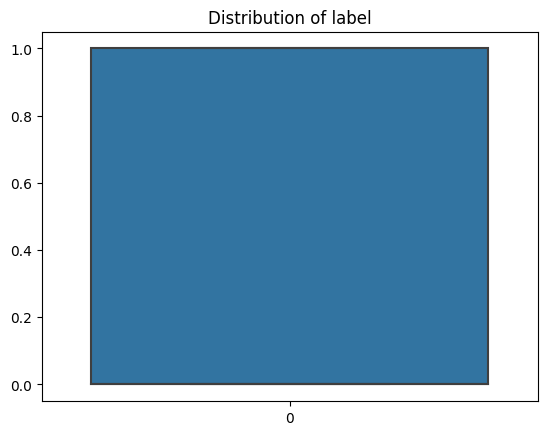

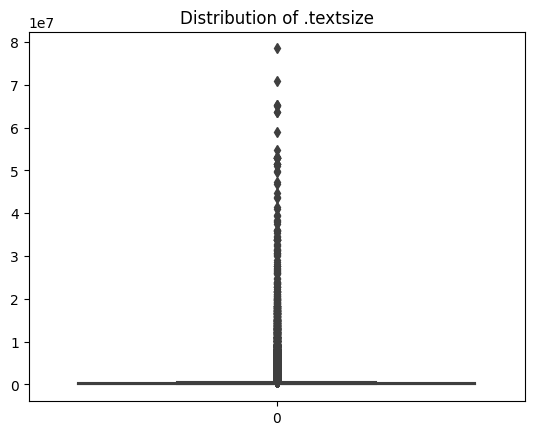

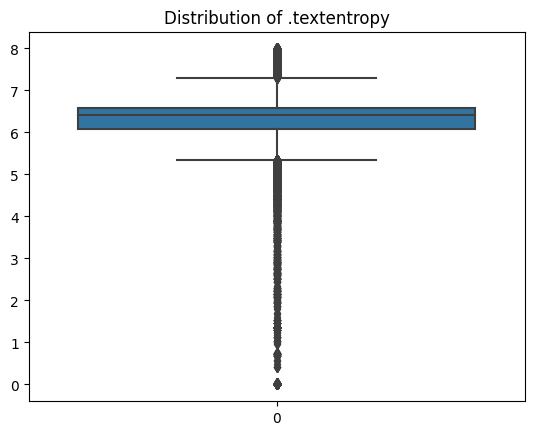

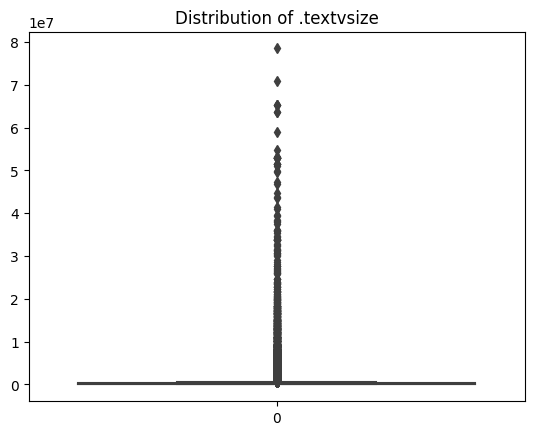

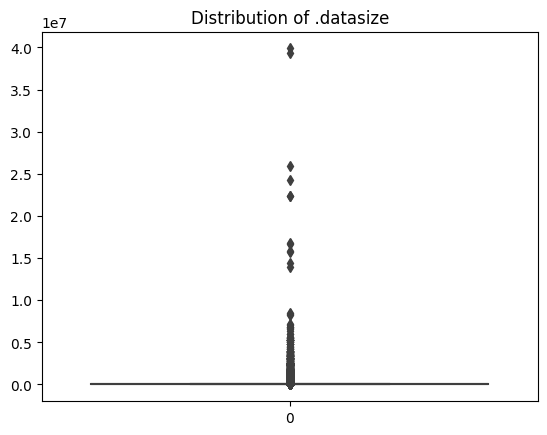

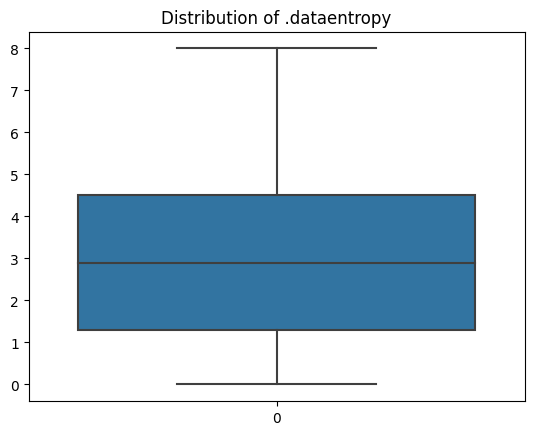

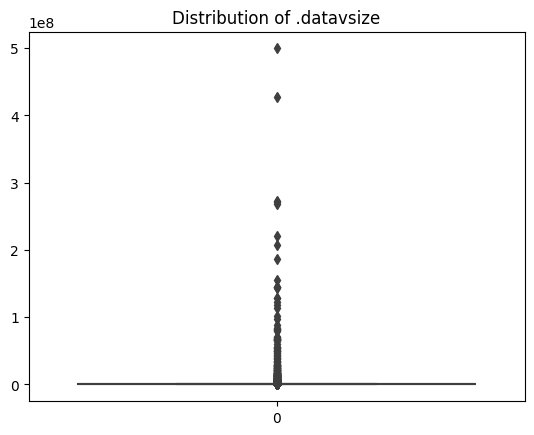

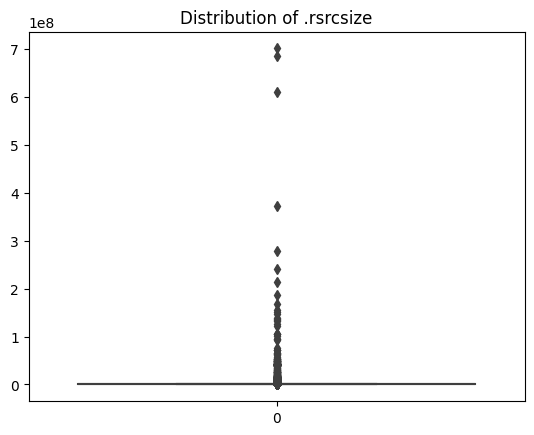

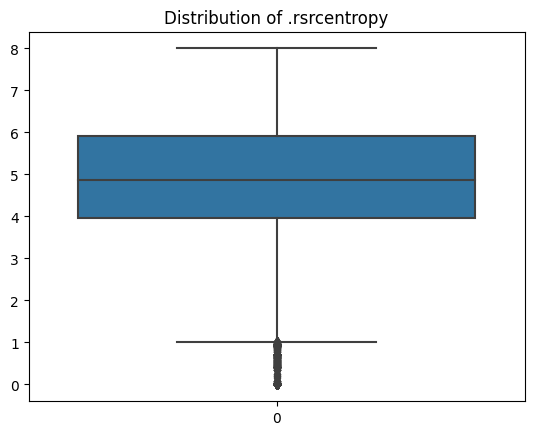

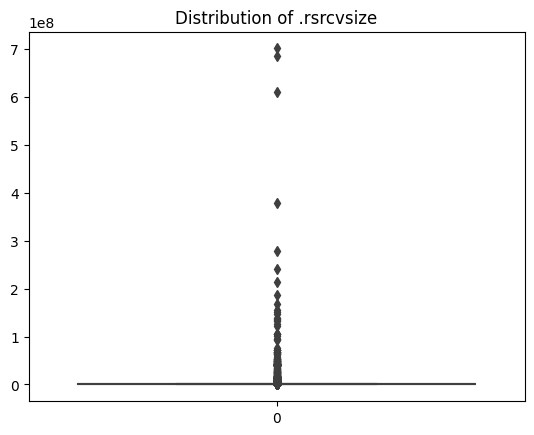

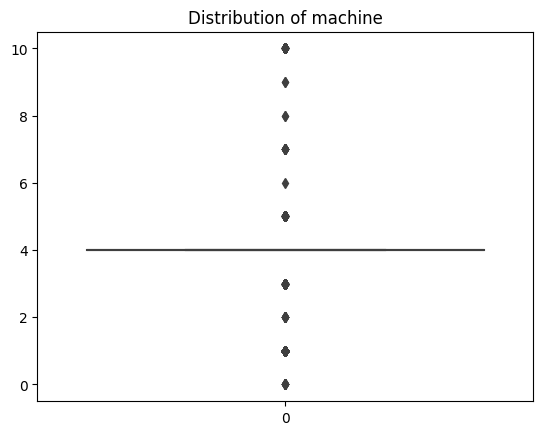

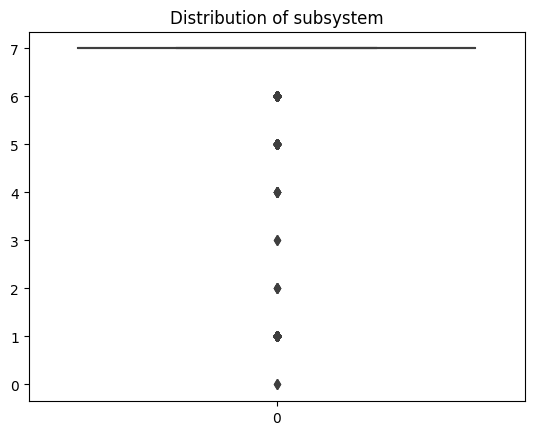

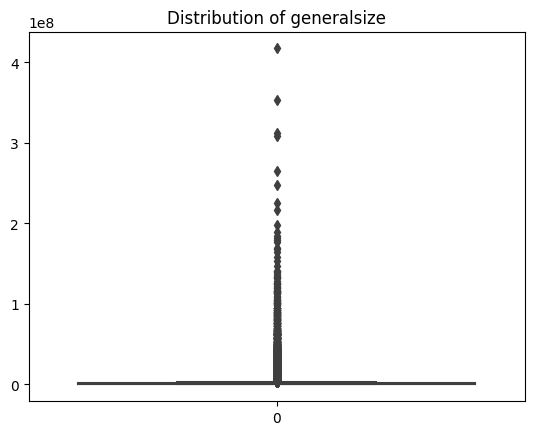

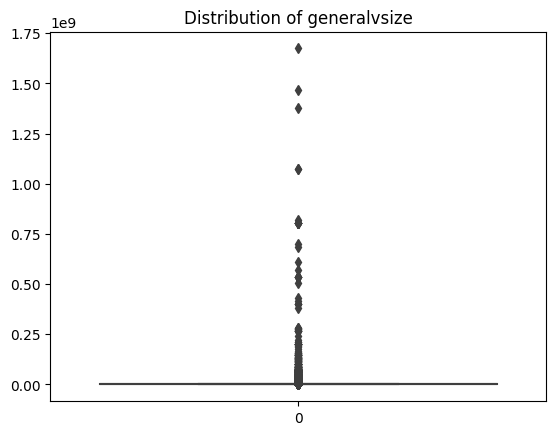

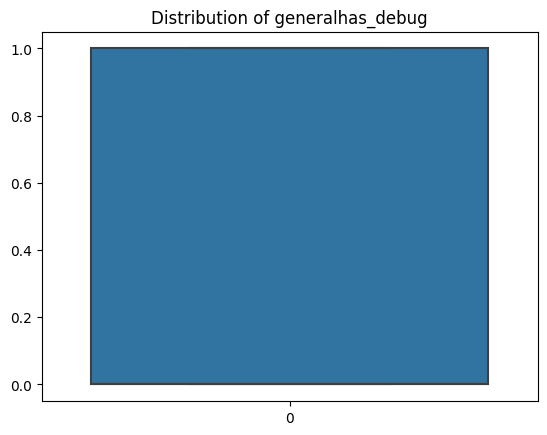

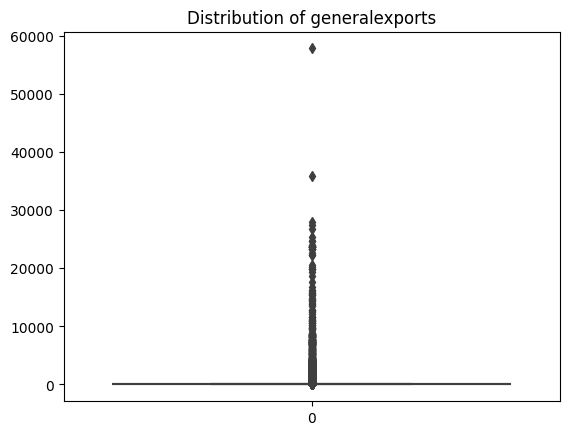

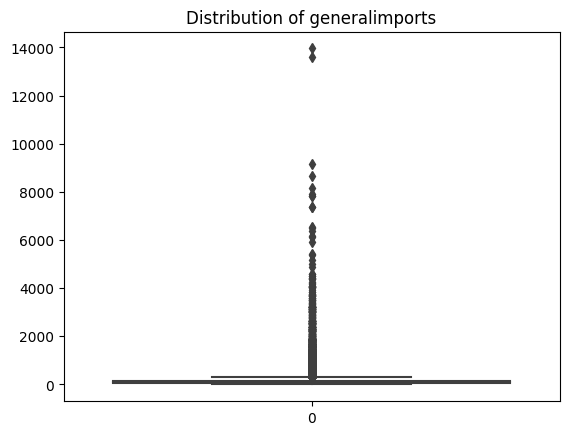

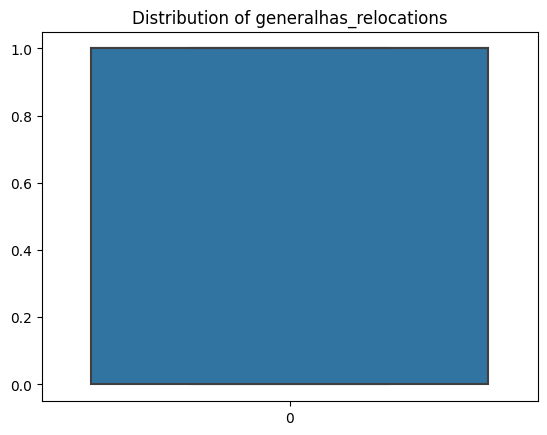

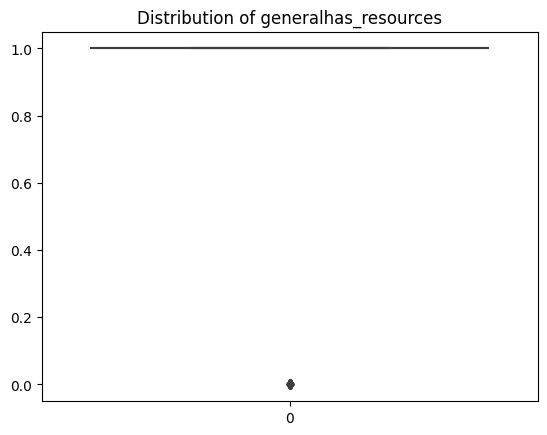

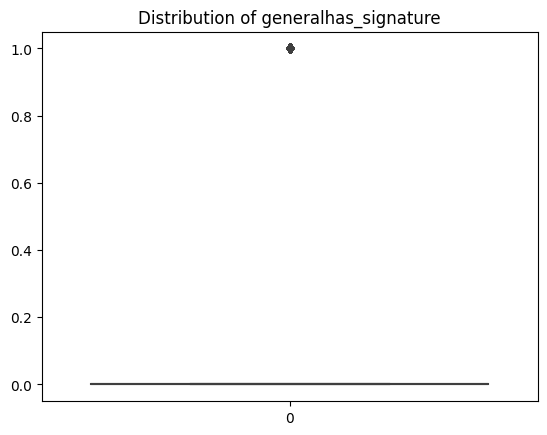

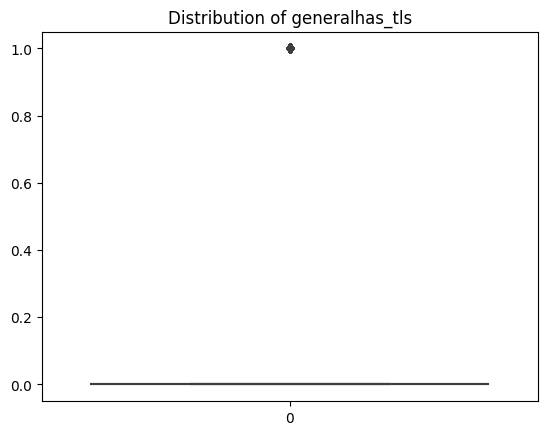

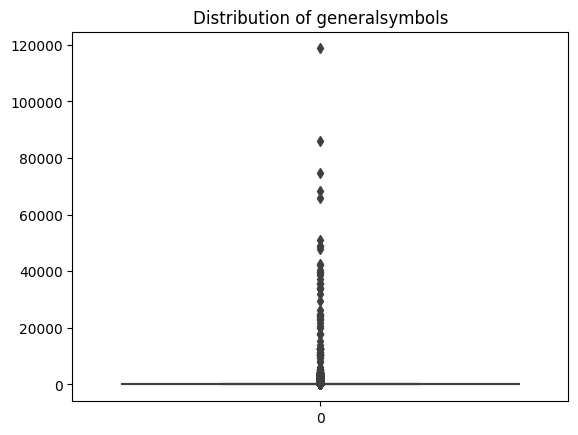

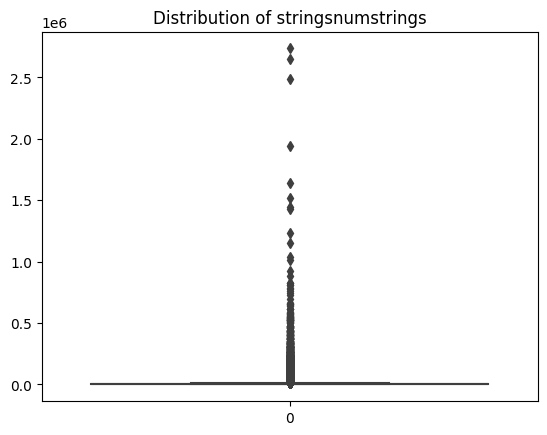

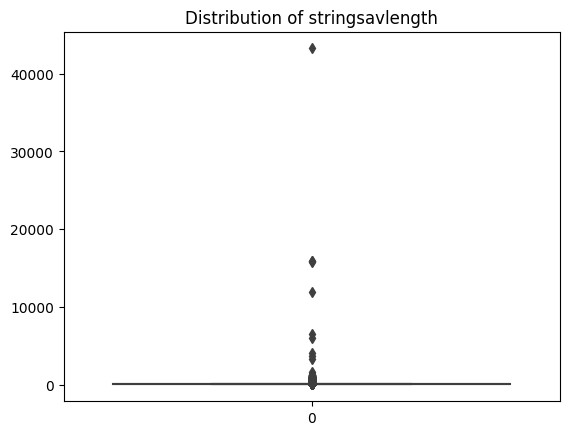

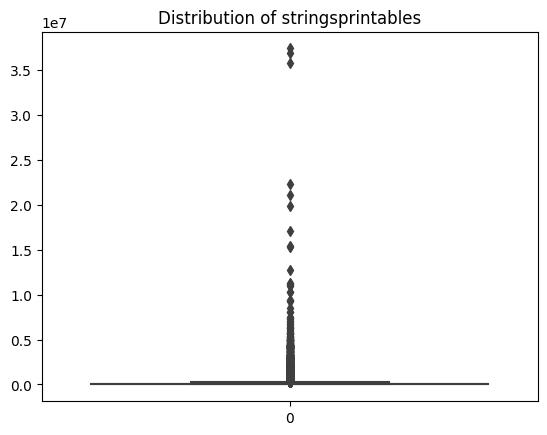

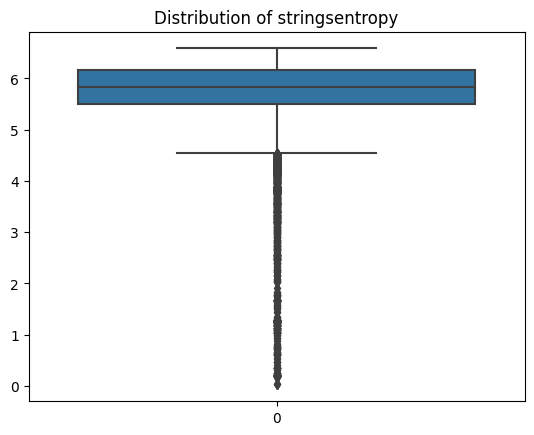

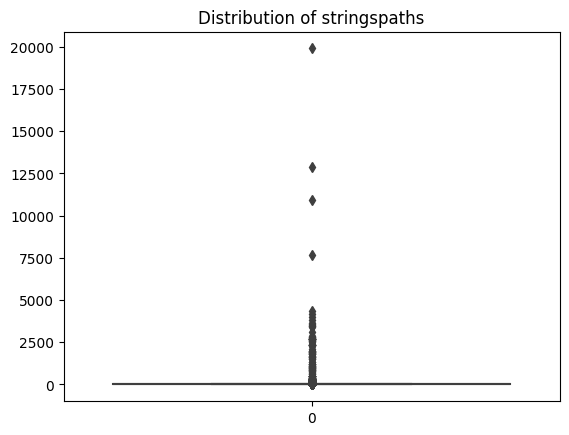

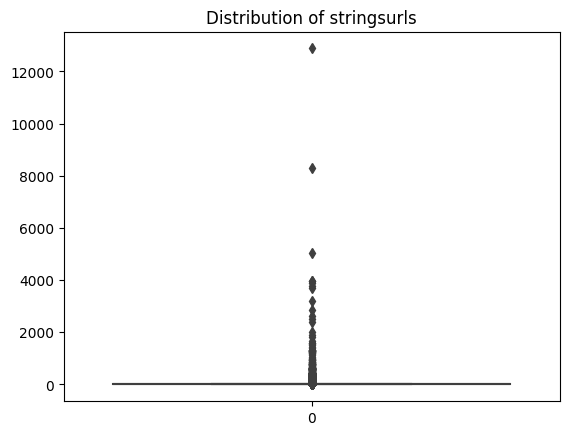

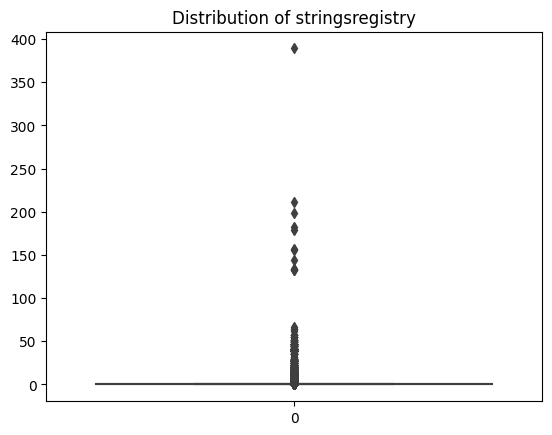

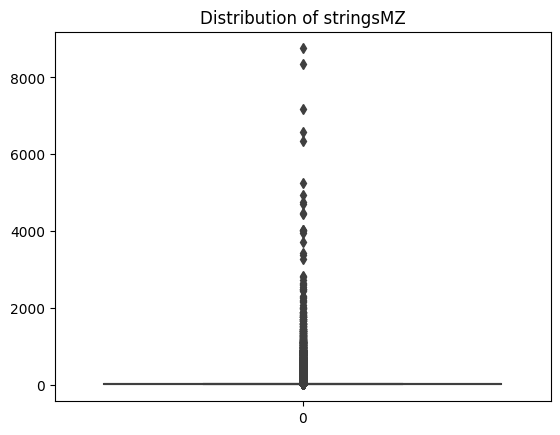

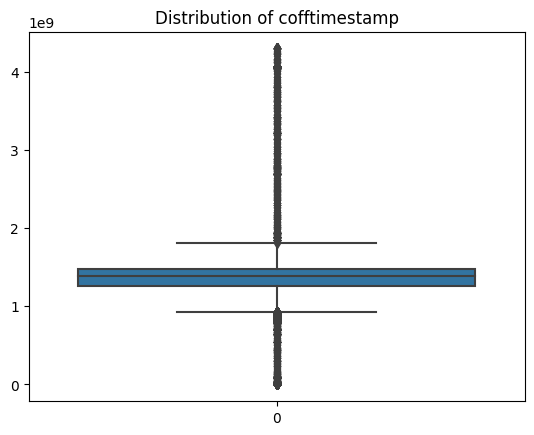

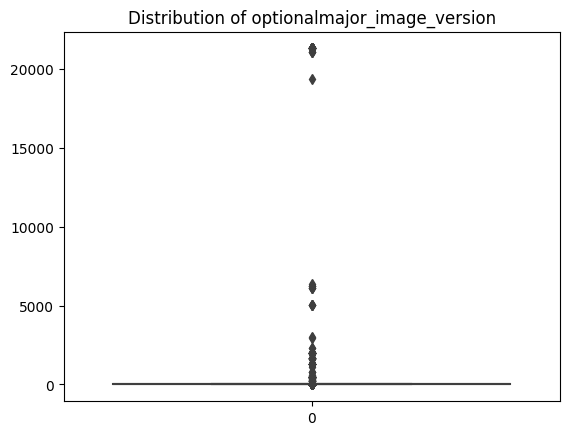

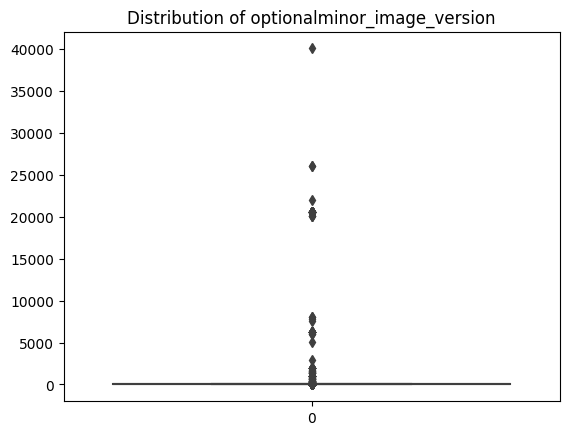

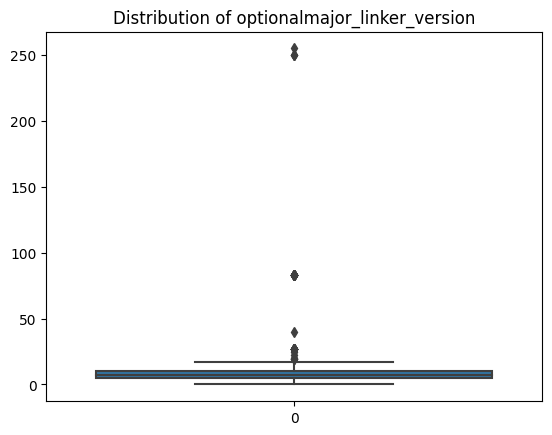

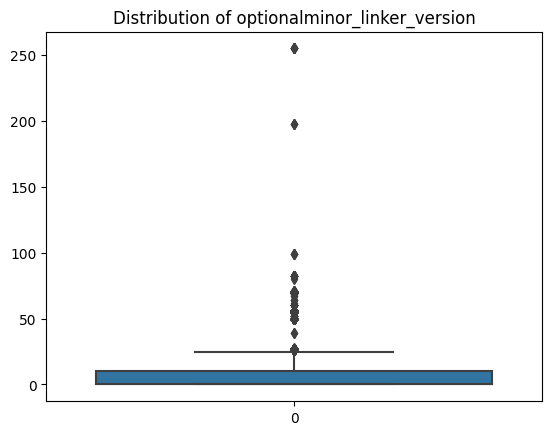

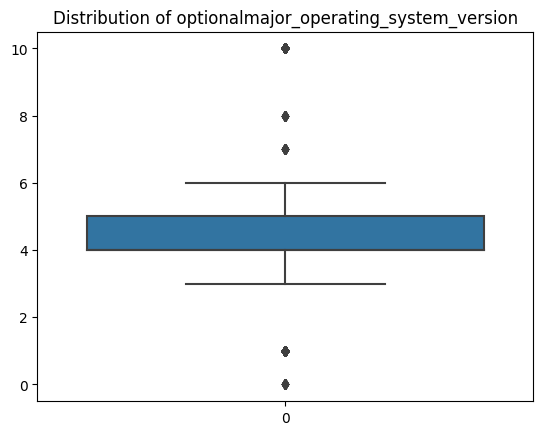

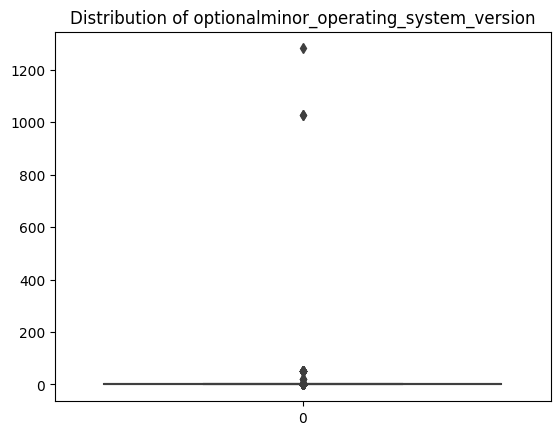

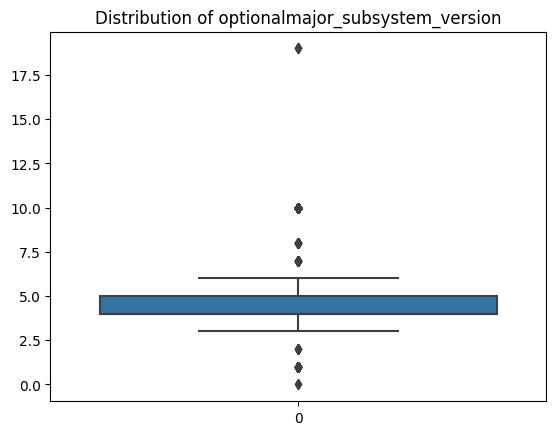

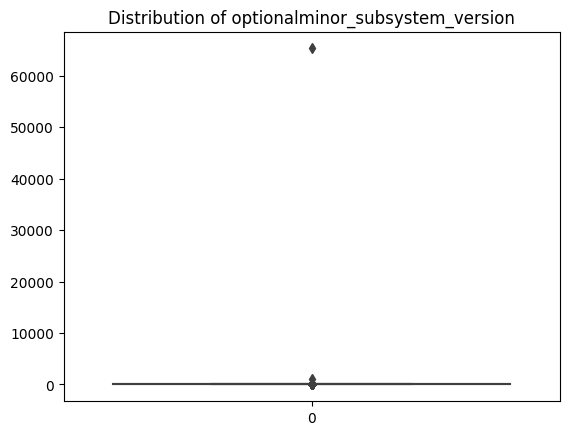

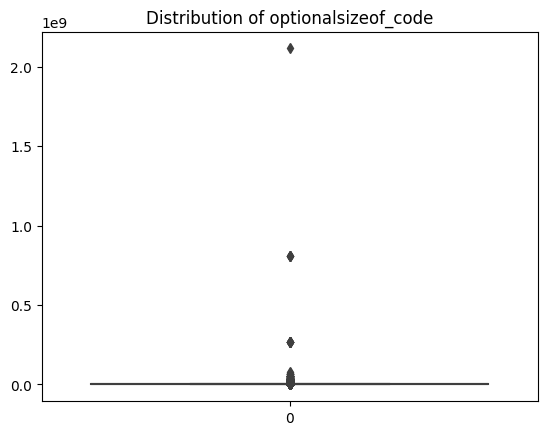

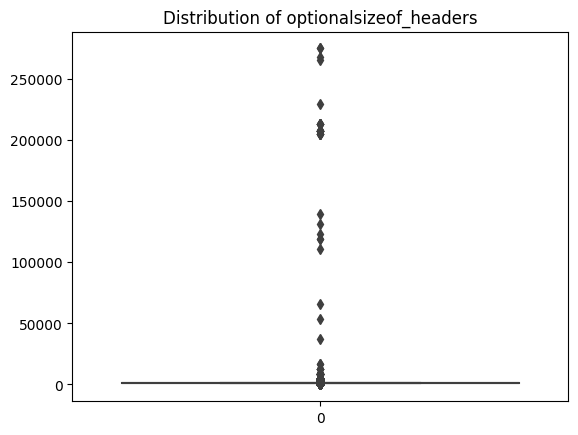

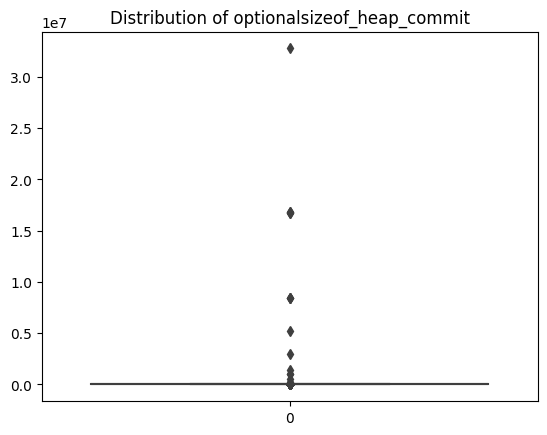

In [9]:

import seaborn as sns
import matplotlib.pyplot as plt
for column in df.columns:
    sns.boxplot(df[column])
    plt.title(f'Distribution of {column}')
    plt.show()

In [10]:
# Columns to exclude from standardization
exclude_columns= [
"machine", "subsystem", "label"
]

df_standardized = df.copy()

scaler = StandardScaler()

for column in df.columns:
    if column not in exclude_columns:
        # Standardize the column
        df_standardized[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))

print(df_standardized)

       label  .textsize  .textentropy  .textvsize  .datasize  .dataentropy   
0          0  -0.219419      0.301750   -0.221299  -0.176055     -0.676861  \
1          0   0.024322      0.678275    0.021178  -0.157262      1.539884   
2          0  -0.215056      0.378423   -0.216907  -0.174802      0.493876   
3          0  -0.188006      0.206885   -0.190530  -0.167285     -0.752650   
4          0  -0.080970      0.239625   -0.085138  -0.157262     -0.424165   
...      ...        ...           ...         ...        ...           ...   
82069      0  -0.233090     -0.313031   -0.234713  -0.176055     -1.388584   
82070      1  -0.197314     -0.036638   -0.201178  -0.167285     -1.191534   
82071      0  -0.162120      0.405433   -0.164277  -0.164779      0.086158   
82072      0  -0.085623     -0.525197   -0.089476  -0.167285     -1.542447   
82073      1  -0.229599      1.017838   -0.231286  -0.168538      1.138363   

       .datavsize  .rsrcsize  .rsrcentropy  .rsrcvsize  ...   


In [11]:
# df_standardized.to_csv('ember_data.csv')

In [12]:
print(df_standardized['label'].nunique())

2


In [18]:
# Get the count of each unique value
value_counts = y.value_counts()

# Retrieve the count of the specific value
c1 = value_counts.get(1, 0)
c2 = value_counts.get(0, 0)

# Print the result
print("Count of", 1, "in column:", c1, c2)

Count of 1 in column: 39649 42425


In [14]:
y = df['label']

X = df.drop('label', axis=1)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
## Model
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

input_shape = (41,)

model = Sequential()

model.add(Dense(128, activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.5)))
model.add(Dropout(0.5)) 

model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.5)))
model.add(Dropout(0.5))

# model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.5)))
# model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

2023-07-05 16:10:57.459091: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-05 16:10:57.578669: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-05 16:10:59.190466: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-05 16:10:59.193633: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-05 16:11:00.094402: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2688      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

2023-07-05 16:11:05.773917: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [17]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
2052/2052 [==============================] - 3s 938us/step - loss: 3231138.0000 - accuracy: 0.5066 - val_loss: 49.8929 - val_accuracy: 0.5124
Epoch 2/100
2052/2052 [==============================] - 2s 817us/step - loss: 20182.1758 - accuracy: 0.5110 - val_loss: 48.8144 - val_accuracy: 0.5124
Epoch 3/100
2052/2052 [==============================] - 2s 817us/step - loss: 5252.3198 - accuracy: 0.5158 - val_loss: 47.9490 - val_accuracy: 0.5124
Epoch 4/100
2052/2052 [==============================] - 2s 810us/step - loss: 1213.6061 - accuracy: 0.5172 - val_loss: 47.1016 - val_accuracy: 0.5124
Epoch 5/100
2052/2052 [==============================] - 2s 820us/step - loss: 746.6643 - accuracy: 0.5177 - val_loss: 46.1253 - val_accuracy: 0.5124
Epoch 6/100
2052/2052 [==============================] - 2s 812us/step - loss: 613.2482 - accuracy: 0.5183 - val_loss: 45.1574 - val_accuracy: 0.5124
Epoch 7/100
2052/2052 [==============================] - 2s 815us/step - loss: 690.5621 - ac

2052/2052 [==============================] - 2s 824us/step - loss: 0.6925 - accuracy: 0.5180 - val_loss: 0.6930 - val_accuracy: 0.5124
Epoch 57/100
2052/2052 [==============================] - 2s 811us/step - loss: 0.6925 - accuracy: 0.5180 - val_loss: 0.6930 - val_accuracy: 0.5124
Epoch 58/100
2052/2052 [==============================] - 2s 807us/step - loss: 0.6925 - accuracy: 0.5180 - val_loss: 0.6929 - val_accuracy: 0.5124
Epoch 59/100
2052/2052 [==============================] - 2s 809us/step - loss: 0.6925 - accuracy: 0.5180 - val_loss: 0.6929 - val_accuracy: 0.5124
Epoch 60/100
2052/2052 [==============================] - 2s 813us/step - loss: 0.6925 - accuracy: 0.5180 - val_loss: 0.6929 - val_accuracy: 0.5124
Epoch 61/100
2052/2052 [==============================] - 2s 813us/step - loss: 0.6925 - accuracy: 0.5180 - val_loss: 0.6928 - val_accuracy: 0.5124
Epoch 62/100
2052/2052 [==============================] - 2s 805us/step - loss: 0.6925 - accuracy: 0.5180 - val_loss: 0.6929 